Welcome to the Titanic Dataset Visualization Notebook! In this notebook, we will explore and visualize the famous "Titanic: Machine Learning from Disaster" dataset. This dataset contains information about the passengers aboard the Titanic, including their demographics, cabin class, ticket fare, and survival outcome.

Throughout the notebook, we provide detailed descriptions for each plot, guiding you through the visualizations and highlighting the insights they reveal.

Data visualization plays a crucial role in understanding and communicating patterns within the Titanic dataset. By the end of this notebook, you will have gained valuable insights into the passenger characteristics, survival rates, and potential correlations within the dataset.

Let's dive in and explore the Titanic dataset through the power of data visualization!

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
train_data=pd.read_csv('train.csv') #reading the csv file 
test_data=pd.read_csv('test.csv') 
full_data=pd.concat([train_data,test_data],axis=0,sort=False) #concatenating the train and test data 
full_data.head() #checking the first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.head() #checking the first 5 rows of the dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


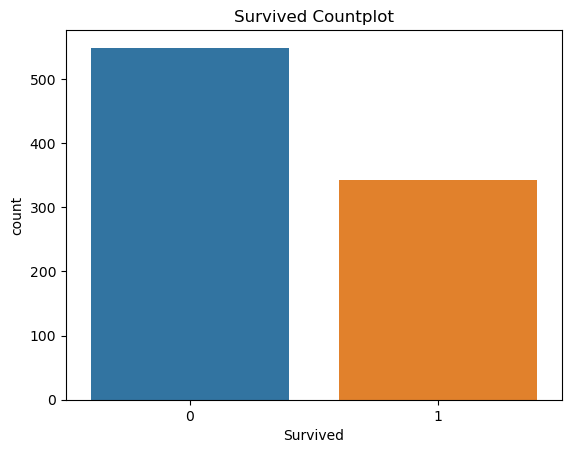

In [4]:
# Data Analysis Countplot
sns.countplot(x='Survived',data=train_data) #countplot for survived column
plt.title('Survived Countplot') 
plt.show() 

In [ ]:
# # Countplot of survival by gender 
# # change int value to string 
# df['Survived']=df['Survived'].replace(0,'No') 
# df['Survived']=df['Survived'].replace(1,'Yes') 

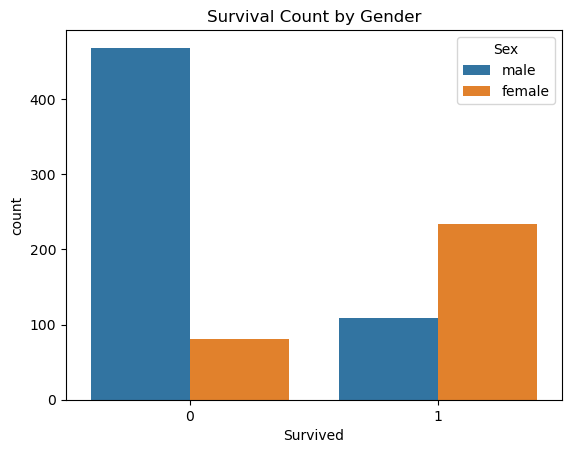

In [5]:
sns.countplot(x='Survived', data=train_data, hue='Sex') #countplot for survived column 
plt.title('Survival Count by Gender') 
plt.show()  

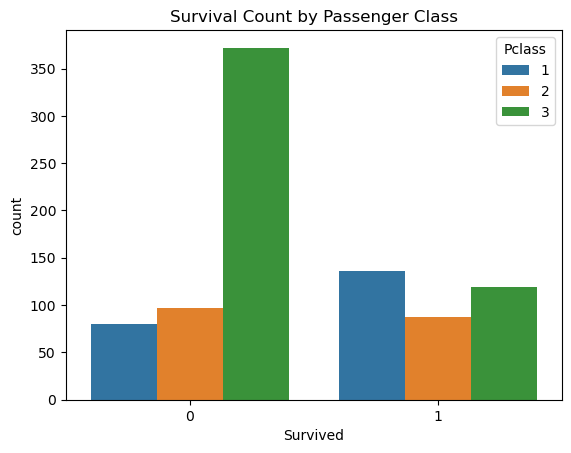

In [6]:
sns.countplot(x='Survived', data=train_data, hue='Pclass') #countplot for survived column 
plt.title('Survival Count by Passenger Class') 
plt.show()

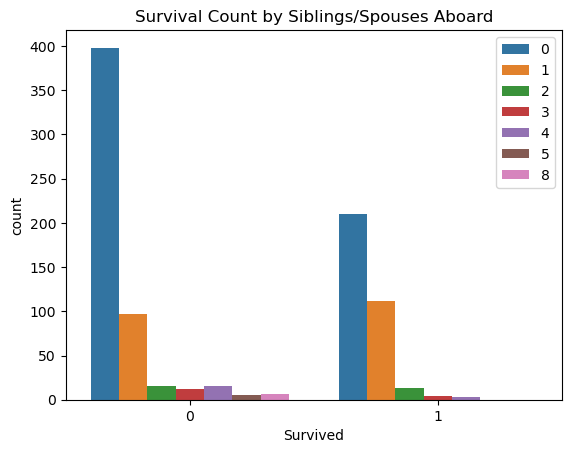

In [10]:
#4. Countplot of survival by number of siblings/spouses aboard:
# This plot presents the count of passengers who survived and those who did not survive, categorized by the number of siblings/spouses they had aboard.
# It helps to explore the influence of having siblings/spouses on survival. 

ax=sns.countplot(x='Survived', hue="SibSp", data=train_data)
plt.title('Survival Count by Siblings/Spouses Aboard')
plt.legend(loc='upper right') 
#sns.move_legend(ax, "center right") #moving the legend to the upper right corner of the plot
plt.show()

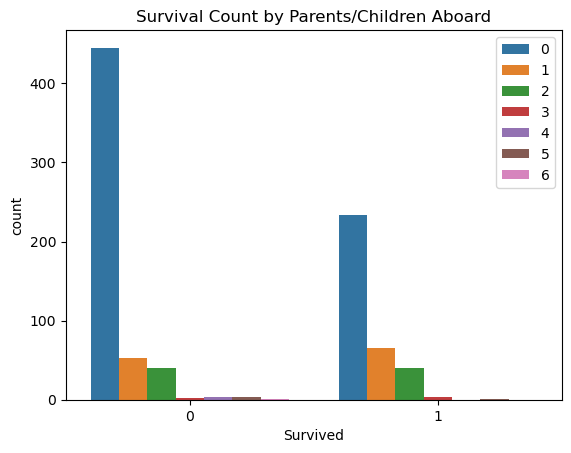

In [12]:
#5.Countplot of survival by number of parents/children aboard: 
#his plot showcases the count of passengers who survived and those who did not survive, categorized by the number of parents/children they had aboard.
#It provides insights into the impact of having parents/children on survival.
sns.countplot(x='Survived', hue="Parch", data=train_data) 
plt.title('Survival Count by Parents/Children Aboard') 
plt.legend(loc='upper right') 
plt.show()  

In [13]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean()) #filling the missing values in the Age column with the mean age  of all passengers

In [14]:
train_data['Age']=train_data['Age'].astype(int) #histogram of the Age column

<Axes: ylabel='Frequency'>

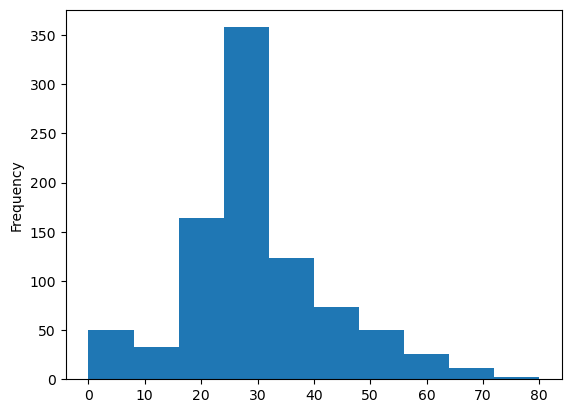

In [15]:
#Histogram of the Age column 
train_data['Age'].plot.hist()

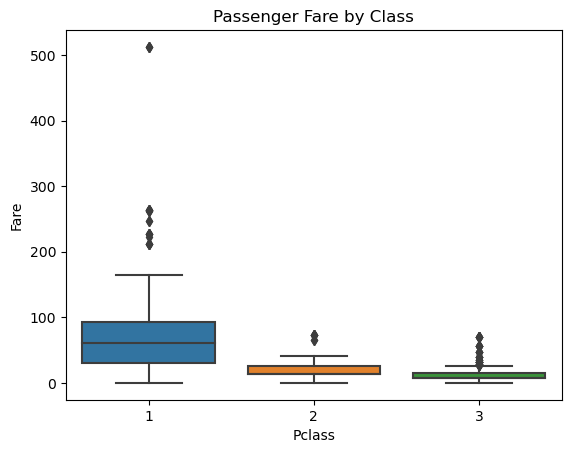

In [16]:
#Histogram of the Fare column 
#7. Boxplot of passenger fare by passenger class:
#This plot displays the distribution of passenger fares across different passenger classes using quartiles.
#It provides insights into the fare differences among different passenger classes and the presence of outliers. 

sns.boxplot(x='Pclass', y='Fare', data=train_data) 
plt.title('Passenger Fare by Class') 
plt.show() 


In [17]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


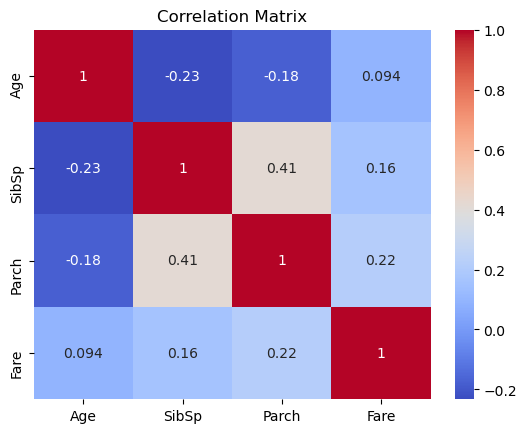

In [18]:
#8. Heatmap of correlation between numeric features:
#This plot shows the correlation between numeric features using colors, where darker colors represent stronger correlations.
#It helps to identify relationships and dependencies among numeric variables in the dataset.
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare'] 
correlation_matrix = train_data[numeric_features].corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix') 
plt.show()

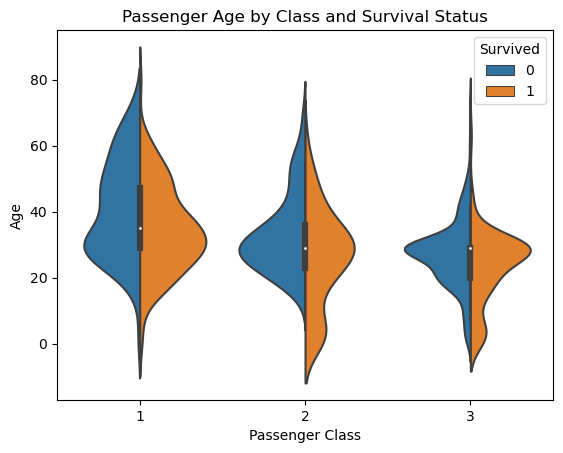

In [19]:
#10. Violinplot of passenger age by passenger class and survival status: 
# This plot depicts the distribution of passenger ages by passenger class and
# survival status using violin shapes.
# It provides insights into the age distribution and its relationship
# with passenger class and survival.
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True)  
plt.title('Passenger Age by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age') 
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


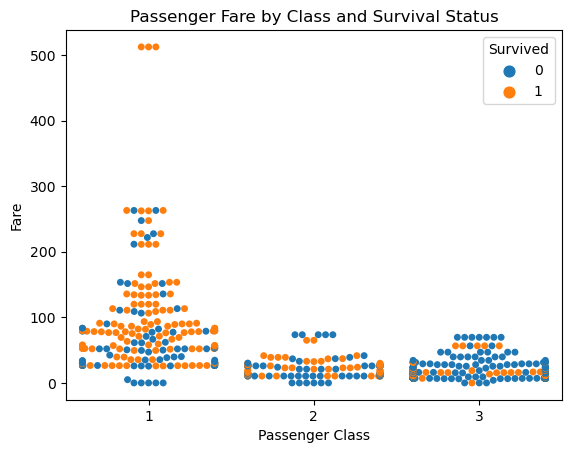

In [20]:
# 11. Swarmplot of passenger fare by passenger class and survival: 
#This plot displays individual data points of passenger fares, categorized by passenger class and survival status,
# along the categorical axis.
#It helps to examine the fare distribution and 
#Its relationship with passenger class and survival.
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', data=train_data) 
plt.title('Passenger Fare by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare') 
plt.show() 

In [ ]:
# # Pairwise correlation plot
# corr_data = train_data.drop(['PassengerId'], axis=1).corr()
# sns.heatmap(corr_data, annot=True, cmap='coolwarm')
# plt.title('Pairwise Correlation Plot')
# plt.show()

# Explore Data 

In [ ]:
#train_data.head(3).style.background_gradient(cmap='greys') 

In [ ]:
#updgrade pandas to use pd.DataFrame.style.background_gradient
#! pip install --upgrade pandas 

# Prepare data removing outliers

In [ ]:
# #Lets visialize the numerical continous features for outliers
# #sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
# print("Reletive Plot Of Some Selected Features: A Data Subset")
# plt.figure()
# sns.pairplot(train_data[[ "Survived","Age","SibSp", "Parch","Fare"]], hue= "Survived",palette= "dark")

In [21]:
#Dropping the outliers by setting a cap on SibSp and Fare. 
print("The total number of data-points before removing the outliers are:", len(train_data))
train_data = train_data[(train_data["SibSp"]<6)]
train_data = train_data[(train_data["Fare"]<350)]
train_data = train_data[(train_data["Parch"]<5)]
print("The total number of data-points after removing the outliers are:", len(train_data))

The total number of data-points before removing the outliers are: 891
The total number of data-points after removing the outliers are: 875


In [22]:
# Name 
# Extracting salutation to check the correlation with Target 
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

train_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)

train_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major',  'Col', 'Capt', 'Jonkheer'],
                            'Rare Title', inplace = True)

train_data['Title'].replace(['the Countess', 'Lady', 'Sir'],'Honarary', inplace = True)

train_data['Title'].value_counts() 

Title
Mr            511
Miss          181
Mrs           121
Master         39
Rare Title     20
Honarary        3
Name: count, dtype: int64

In [23]:
# repeating same for test data
test_data['Title']=test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()) 
test_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
test_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major',  'Col', 'Capt', 'Jonkheer'],
                            'Rare Title', inplace = True) 
test_data['Title'].replace(['the Countess', 'Lady', 'Sir'],'Honarary', inplace = True)
test_data['Title'].value_counts() 

Title
Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      5
Dona            1
Name: count, dtype: int64

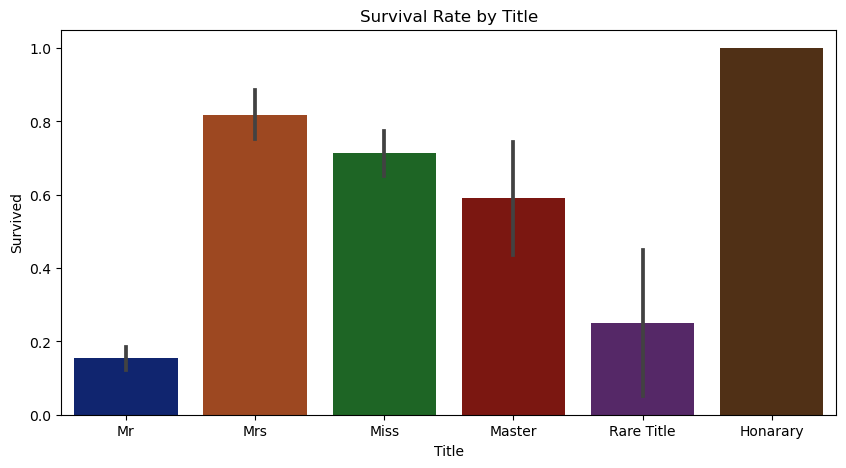

In [24]:
plt.figure(figsize=(10,5)) 
sns.barplot(x='Title', y='Survived', data=train_data, palette='dark') 
plt.title('Survival Rate by Title')
plt.show() 

In [25]:
#to include for modelling lets map each of the title groups to a numerical value (Encoding)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare Title": 5, "Honarary": 6}
train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

In [ ]:
# #Dropping Name from both train and test
# train_data = train_data.drop("Name",axis=1)
# test_data = test_data.drop("Name",axis=1)
# #train_data.head(3).style.set_properties(subset=['Title'], **{'background-color': 'yellow'})

In [26]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

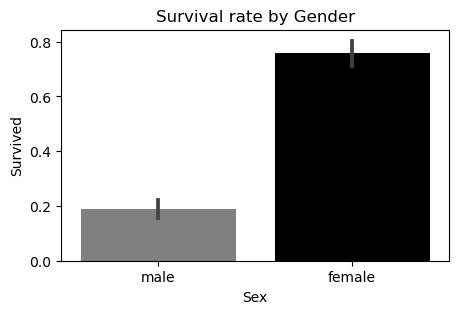

In [27]:
cols = ['grey','black']
plt.figure(figsize=(5,3))   
sns.barplot(x = train_data["Sex"], y = train_data["Survived"],palette=cols)
plt.title("Survival rate by Gender")
plt.show()

In [28]:
pd.crosstab(train_data['Sex'], train_data['Survived'], normalize = 'index') 

Survived,0,1
Sex,,
female,0.242623,0.757377
male,0.812281,0.187719


In [29]:
# No doubt, Female has highest survival rate of ~75% compare to that of Men with ~ 20%.
# Conclusion : Sex to include for building model alogrithm

In [30]:
#replacing missing values with its Median 
train_data["Age"].replace(np.nan,train_data["Age"].median(), inplace=True)
test_data["Age"].replace(np.nan,test_data["Age"].median(), inplace=True)

#Bin names
bin_names=["Baby","Child","Teenager","Early Adult","Adult","Late Adult","Senior"]

#Sorting asc and drawing divider to the column
bins_train = np.linspace(min(train_data["Age"]),max(train_data["Age"]),8)
bins_test = np.linspace(min(test_data["Age"]),max(test_data["Age"]),8)

#dividing the column
train_data["Age_binned"] = pd.cut(train_data["Age"],bins_train,labels = bin_names,include_lowest=True)
test_data["Age_binned"] = pd.cut(test_data["Age"],bins_test,labels = bin_names,include_lowest=True)

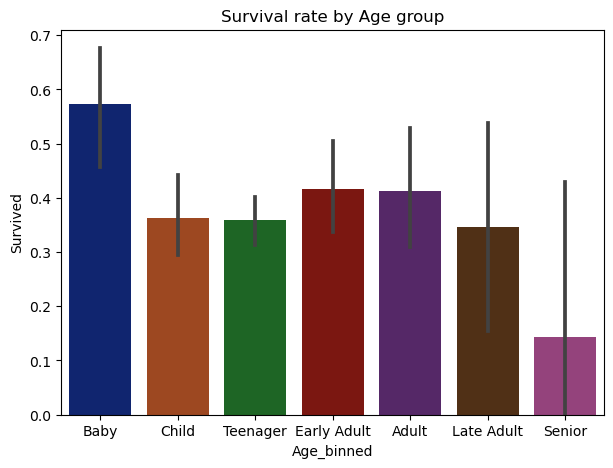

In [31]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Age group")
sns.barplot(x=train_data["Age_binned"],y=train_data["Survived"],palette="dark")
plt.show()

In [32]:
# Converting to numerical data
title_mapping = {"Baby":1,"Child":2,"Teenager":3,"Early Adult":4,"Adult":5,"Late Adult":6,"Senior": 7}
train_data["Age_binned"] = train_data["Age_binned"].map(title_mapping)
test_data["Age_binned"] = test_data["Age_binned"].map(title_mapping)
train_data = train_data.drop("Age",axis=1)
test_data = test_data.drop("Age",axis=1) 

In [33]:
train_data["SibSp"].value_counts()

SibSp
0    603
1    205
2     28
4     18
3     16
5      5
Name: count, dtype: int64

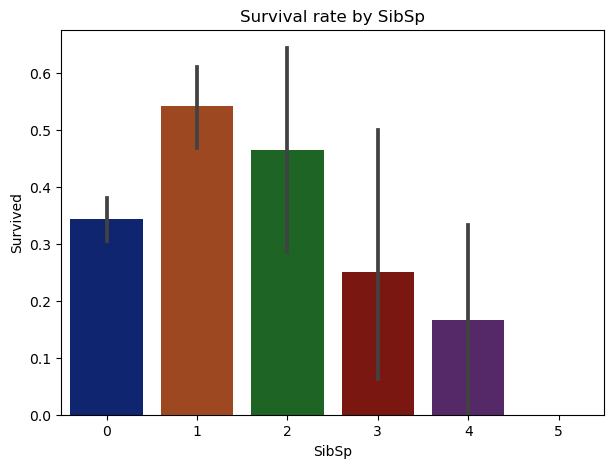

In [34]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by SibSp")
sns.barplot(x=train_data["SibSp"],y=train_data["Survived"],palette='dark')
plt.show()

In [35]:
train_data["Parch"].value_counts()

Parch
0    676
1    117
2     73
3      5
4      4
Name: count, dtype: int64

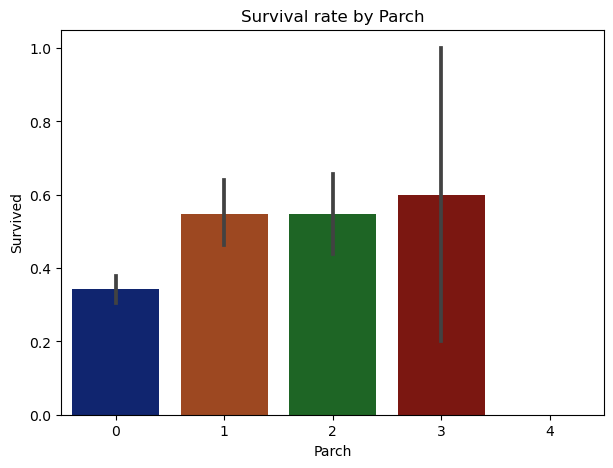

In [36]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Parch")
sns.barplot(x=train_data["Parch"],y=train_data["Survived"],palette='dark')
plt.show()

In [37]:
# Considering to drop these two columns as Tikect dont contribute any information to predictive model and Cabin has ~80% missing values.
to_drop = ["Ticket","Cabin"]
train_data = train_data.drop(to_drop,axis=1)
test_data = test_data.drop(to_drop,axis=1)

In [38]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'Age_binned'],
      dtype='object')

In [39]:
#Replacig missing value with median in test data
test_data["Fare"].replace(np.nan,test_data["Fare"].median(), inplace=True)

In [40]:
labels = ["low","mid","standard","premium","gold"]
train_data['Fare_binned'] = pd.qcut(train_data['Fare'],5,labels=labels)
test_data['Fare_binned'] = pd.qcut(test_data['Fare'], 5,labels=labels)
train_data['Fare_binned'].value_counts()

Fare_binned
mid         184
low         179
gold        173
premium     172
standard    167
Name: count, dtype: int64

In [ ]:
# plt.figure(figsize=(5,3))  
# plt.title("Survival rate by Fare")
# plt.xlim(0,200)
# sns.histplot(train_data['Fare'])
# plt.show()

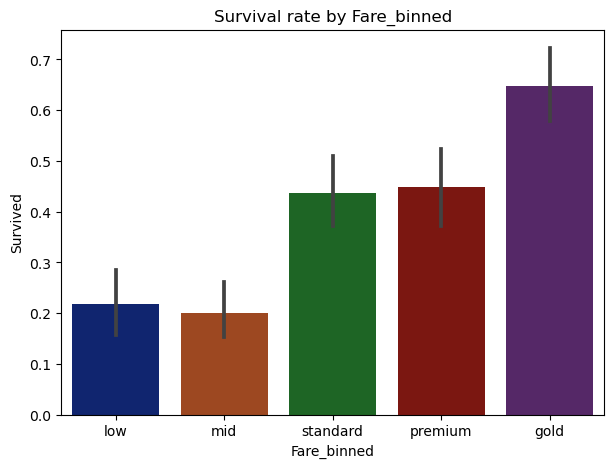

In [41]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Fare_binned")
sns.barplot(x=train_data["Fare_binned"],y=train_data["Survived"],palette='dark')
plt.show()

In [42]:
# After binning Fare it is abvious that higher the fare price is higher will be the survival chance.
# Conclusion: Fare_binned to include for Modelling 
# Converting to numerical data
fare_mapping = {"low":1,"mid":2,"standard":3,"premium":4,"gold":5}
train_data["Fare_binned"] = train_data["Fare_binned"].map(fare_mapping)
test_data["Fare_binned"] = test_data["Fare_binned"].map(fare_mapping)
train_data = train_data.drop("Fare",axis=1)
test_data = test_data.drop("Fare",axis=1)

In [43]:
train_data["Embarked"].value_counts()

Embarked
S    632
C    165
Q     76
Name: count, dtype: int64

In [44]:
#Replacing missing values from train data with frequency to embarked column
train_data["Embarked"].replace(np.nan, train_data["Embarked"].mode()[0], inplace=True)

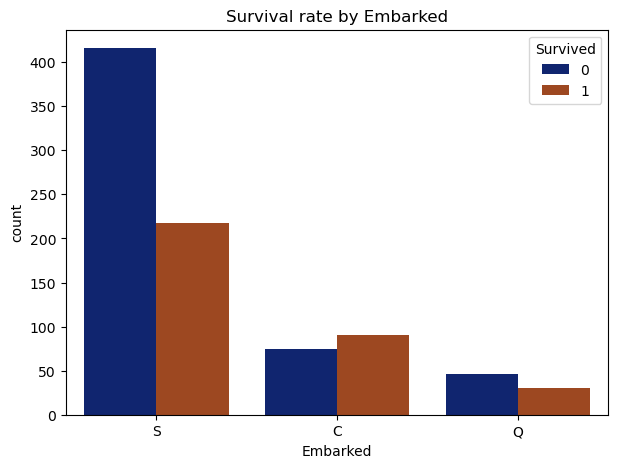

In [45]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Embarked")
sns.countplot(x="Embarked",hue ="Survived", data =train_data,palette='dark')
plt.show()

In [74]:
Embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(Embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(Embarked_mapping)

In [76]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

# Splitting and Scaling data

In [77]:
# import standard scaler 
from sklearn.preprocessing import StandardScaler  
X = train_data[train_data.columns[~train_data.columns.isin(['PassengerId','Survived'])]]
Y = train_data["Survived"] # Target Variable
scaler = StandardScaler()
X.head(3) 

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,3,0,1,0,1,1,2,1
1,1,1,1,0,2,3,4,5
2,3,1,0,0,1,2,3,2


In [78]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled) # Predictor
X_scaled.columns = ["Pclass","Sex","SibSp","Parch","Embarked","Title","Age_binned","Fare_binned"]

In [79]:
# To check Accurancy of different model, spliting Train_data into 80 % train and 20 % test is required.
# import train_test_split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

I will be testing the following models with my training data (got the list from here):

Gaussian Naive Bayes

Logistic Regression

Support Vector Machines

Perceptron

Decision Tree Classifier

Random Forest Classifier

KNN or k-Nearest Neighbors

Stochastic Gradient Descent

Gradient Boosting Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
gaussian= GaussianNB() 
ypred_gaussian = gaussian.fit(x_train,y_train).predict(x_test)
acc_gaussian = round(accuracy_score(ypred_gaussian,y_test)*100,2)
print("Accuracy of GaussianNB model is:",acc_gaussian)

Accuracy of GaussianNB model is: 83.43


In [81]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
logreg = LogisticRegression() 
ypred_logreg = logreg.fit(x_train,y_train).predict(x_test) 
acc_logreg = round(accuracy_score(ypred_logreg,y_test)*100,2) 
print("Accuracy of LogisticRegression model is:",acc_logreg) 

Accuracy of LogisticRegression model is: 81.71


In [82]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
svc = SVC()
ypred_svc = svc.fit(x_train,y_train).predict(x_test) 
acc_svc = round(accuracy_score(ypred_svc,y_test)*100,2) 
print("Accuracy of SVC model is:",acc_svc) 


Accuracy of SVC model is: 85.71


In [83]:
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score 
perceptron = Perceptron()
ypred_perceptron = perceptron.fit(x_train,y_train).predict(x_test) 
acc_perceptron = round(accuracy_score(ypred_perceptron,y_test)*100,2) 
print("Accuracy of Perceptron model is:",acc_perceptron) 

Accuracy of Perceptron model is: 81.14


In [84]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
decisiontree = DecisionTreeClassifier()
ypred_decisiontree = decisiontree.fit(x_train,y_train).predict(x_test) 
acc_decisiontree = round(accuracy_score(ypred_decisiontree,y_test)*100,2)
print("Accuracy of DecisionTreeClassifier model is:",acc_decisiontree) 

Accuracy of DecisionTreeClassifier model is: 84.0


In [85]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
randomforest = RandomForestClassifier() 
ypred_randomforest = randomforest.fit(x_train,y_train).predict(x_test) 
acc_randomforest = round(accuracy_score(ypred_randomforest,y_test)*100,2) 
print("Accuracy of RandomForestClassifier model is:",acc_randomforest)

Accuracy of RandomForestClassifier model is: 84.57


In [86]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
ypred_knn = knn.fit(x_train,y_train).predict(x_test) 
acc_knn = round(accuracy_score(ypred_knn,y_test)*100,2) 
print("Accuracy of KNeighborsClassifier model is:",acc_knn) 

Accuracy of KNeighborsClassifier model is: 85.14


In [87]:
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import accuracy_score
sgdc=SGDClassifier()
ypred_sgdc = sgdc.fit(x_train,y_train).predict(x_test)
acc_sgdc = round(accuracy_score(ypred_sgdc,y_test)*100,2) 
print("Accuracy of SGDClassifier model is:",acc_sgdc) 

Accuracy of SGDClassifier model is: 77.71


In [88]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
gbk = GradientBoostingClassifier() 
ypred_gbk = gbk.fit(x_train,y_train).predict(x_test) 
acc_gbk = round(accuracy_score(ypred_gbk,y_test)*100,2) 
print("Accuracy of GradientBoostingClassifier model is:",acc_gbk) 

Accuracy of GradientBoostingClassifier model is: 85.14


In [92]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                'Random Forest',  'Perceptron', 
                'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
                acc_randomforest, acc_gaussian, acc_perceptron, acc_decisiontree, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,85.71
1,KNN,85.14
7,Gradient Boosting Classifier,85.14
3,Random Forest,84.57
6,Stochastic Gradient Descent,84.00
4,Perceptron,83.43
2,Logistic Regression,81.71
5,Decision Tree,81.14


In [93]:
#scaling test data
test_id = test_data['PassengerId'] 
predictors = test_data[test_data.columns[~test_data.columns.isin(['PassengerId'])]]
scaler_test = StandardScaler()
predictors.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,3,0,0,0,3,1.0,4,2
1,3,1,1,0,1,3.0,5,1
2,2,0,0,0,3,1.0,6,2


In [94]:
predictors_scaled = scaler_test.fit_transform(predictors)
predictors_scaled = pd.DataFrame(predictors_scaled) # Predictor
predictors_scaled.columns = ["Pclass","Sex","SibSp","Parch","Embarked","Title","Age_binned","Fare_binned"]
predictors_scaled.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,0.873482,-0.755929,-0.499470,-0.400248,2.243165,-0.738743,0.652641,-0.703316
1,0.873482,1.322876,0.616992,-0.400248,-0.677841,1.274693,1.507826,-1.408319
2,-0.315819,-0.755929,-0.499470,-0.400248,2.243165,-0.738743,2.363011,-0.703316


In [97]:
predictors_scaled.dropna(inplace=True)

In [98]:
#Using SVM for Prediction
predictions = svc.predict(predictors_scaled)

In [100]:
output = pd.DataFrame({ 'PassengerId' : p_id, 'Survived': predictions })
#output.to_csv('submission.csv', index=False)